In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import signal

import h5py

In [2]:
%matplotlib notebook

In [3]:
%reload_ext autoreload
%autoreload 2

In [4]:
import sys
sys.path.append('../../../nadavp/new_trap/Tools/')
import BeadDataFile
from discharge_tools import *

### Calibration

<IPython.core.display.Javascript object>


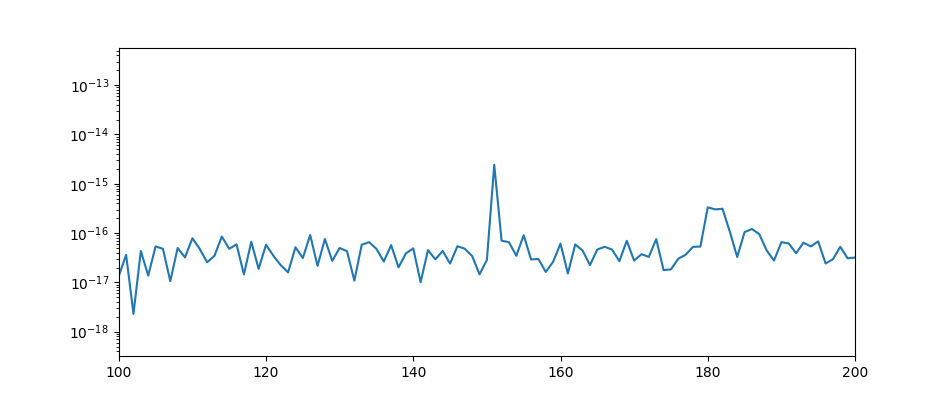

(4.146492019735352e-17, 2.0942572118032554e-17)

In [5]:
fname = r'/data/new_trap/20190813/Bead1/Discharge/Discharge_27.h5'
bdf_calib = BeadDataFile.BeadDataFile(fname)
_, ax = plt.subplots(figsize=(9.5,4))
freq,fft = bdf_calib.welch_psd('x', res=5000)
fft = np.sqrt(fft)

x = bdf_calib.x2[:5000]
fft = np.abs(np.fft.rfft(x,norm='ortho'))
freq = np.fft.rfftfreq(len(x), d=1./5000)

dis_val = fft[(freq>150.5)*(freq<151.5)]
scale = 1.6e-19*10*20/8.6e-3*0.65/dis_val ## 10 charges
ax.semilogy(freq, fft*scale)
ax.set(xlim=(100,200))
np.mean(scale*fft[(freq>120)*(freq<140)]), np.std(scale*fft[(freq>120)*(freq<140)])

In [6]:
freq.shape, fft.shape, fft[(freq>150.5)*(freq<151.5)]

((2501,), (2501,), array([0.00982143]))

In [183]:
sum((freq>150.5)*(freq<151.5))
dis_val = fft[(freq>150.5)*(freq<151.5)]
scale = 1.6e-19*10*20/8.6e-3*0.65/dis_val ## 10 charges

### Load shake data

In [184]:
foldername = r'/data/new_trap/20190812/Bead1/Shaking/'
foldername = r'/home/data_transfer/data_from_windows/20190813/Bead1/Shaking/'
# bdf_shake = load_dir(dirname=foldername, file_prefix='Shaking')

fname = '/home/data_transfer/data_from_windows/20190813/Bead1/Shaking/Shaking{}_0.h5'
files = [fname.format(ff_) for ff_ in range(3,17)]
bdf_shake = [BeadDataFile.BeadDataFile(file) for file in files]

In [185]:
bdf_shake1 = bdf_shake

<IPython.core.display.Javascript object>


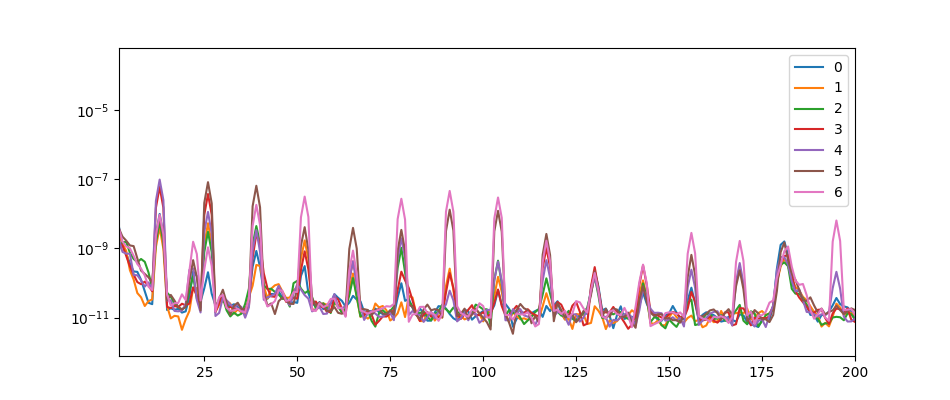

In [186]:
_, ax = plt.subplots(figsize=(9.5,4))
[ax.semilogy(*B.welch_psd('x', res = 5000), label = i) for i,B in enumerate(bdf_shake1[::2])]
ax.set(xlim=(2,200))
ax.legend()
# [ax[1].semilogy(*B.welch_psd('x')) for B in bdf_shake1]
# ax[1].set(xlim=(100,200))

In [163]:
posX = [np.mean(B.cant_pos[0]*50*100/99) for B in bdf_shake1]

In [187]:
posX = np.array([np.mean(BB.cant_pos[0]*50) for BB in bdf_shake1])*100/99
respnoses_13 = np.array([np.std(B.response_at_freq2(str_axis='x', drive_freq=13)) for B in bdf_shake1])*10000
respnoses_26 = np.array([np.std(B.response_at_freq2(str_axis='x', drive_freq=26)) for B in bdf_shake1])*10000
respnoses_39 = np.array([np.std(B.response_at_freq2(str_axis='x', drive_freq=39)) for B in bdf_shake1])*10000
respnoses_100 = np.array([np.std(B.response_at_freq2(str_axis='x', drive_freq=100)) for B in bdf_shake1])*10000

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


<IPython.core.display.Javascript object>


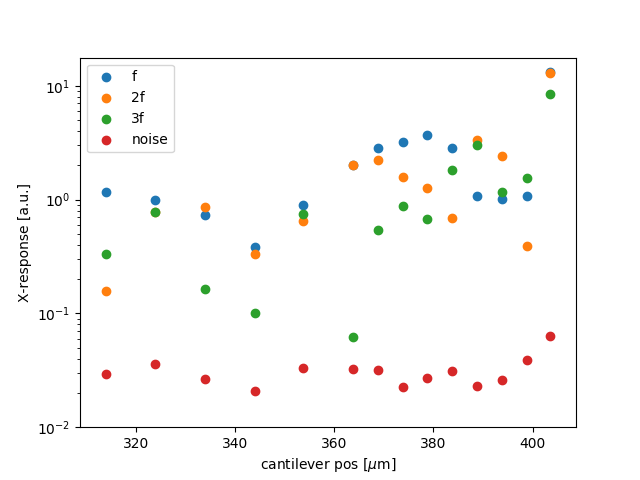

[None,
 (0.01, 17.680769714568072),
 Text(0, 0.5, 'X-response [a.u.]'),
 Text(0.5, 0, 'cantilever pos [$\\mu$m]')]

In [188]:
_,ax = plt.subplots()
ax.scatter(posX, respnoses_13, label ='f')
ax.scatter(posX, respnoses_26, label ='2f')
ax.scatter(posX, respnoses_39, label ='3f')
ax.scatter(posX, respnoses_100, label ='noise')
ax.legend()
ax.set(ylabel='X-response [a.u.]', yscale='log', xlabel='cantilever pos [$\mu$m]', ylim=(1e-2,None))

In [190]:
posX = np.array([np.mean(BB.cant_pos[0]*50) for BB in bdf_shake1])*100/99
respnoses_130 = np.array([np.std(B.response_at_freq2(str_axis='x', drive_freq=130)) for B in bdf_shake1])*10000
respnoses_143 = np.array([np.std(B.response_at_freq2(str_axis='x', drive_freq=143)) for B in bdf_shake1])*10000
respnoses_117 = np.array([np.std(B.response_at_freq2(str_axis='x', drive_freq=117)) for B in bdf_shake1])*10000
respnoses_125 = np.array([np.std(B.response_at_freq2(str_axis='x', drive_freq=125)) for B in bdf_shake1])*10000

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


<IPython.core.display.Javascript object>


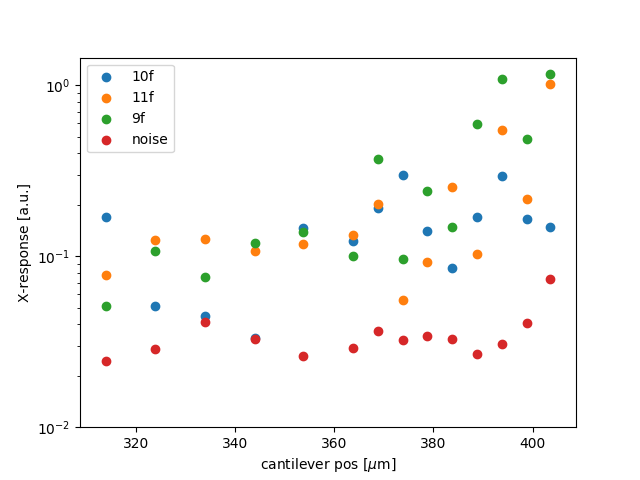

[None,
 (0.01, 1.452822256215134),
 Text(0, 0.5, 'X-response [a.u.]'),
 Text(0.5, 0, 'cantilever pos [$\\mu$m]')]

In [191]:
_,ax = plt.subplots()
ax.scatter(posX, respnoses_130, label ='10f')
ax.scatter(posX, respnoses_143, label ='11f')
ax.scatter(posX, respnoses_117, label ='9f')
ax.scatter(posX, respnoses_125, label ='noise')
ax.legend()
ax.set(ylabel='X-response [a.u.]', yscale='log', xlabel='cantilever pos [$\mu$m]', ylim=(1e-2,None))

### Phase analysis

In [192]:
resp_calib_amp = bdf_calib.response_at_freq2('x', drive_freq=151)*50000
resp_calib_phase = bdf_calib.response_at_freq3('x', drive_freq=151)/3

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [193]:
resp_shake_amp = bdf_shake1[0].response_at_freq2('x', drive_freq=143)*50000
resp_shake_phase = bdf_shake1[0].response_at_freq3('x', drive_freq=143)/3

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [195]:
def give_anlge3(a,b):
    norm = 1
    a = np.mean(a.reshape(-1, 5000), axis=1)/norm
    b = np.mean(b.reshape(-1, 5000), axis=1)/norm
    return np.arctan(a/(b))

In [196]:
def give_ab(a,b,reshape_num=500):
    ab = np.mean(np.arctan(b/a).reshape(-1,reshape_num), axis=1)
    return ab

In [197]:
np.mean(give_ab(resp_calib_phase,resp_calib_amp)), np.mean(give_ab(resp_shake_phase,resp_shake_amp))

(0.37567647457293857, -0.4045577237755021)

<IPython.core.display.Javascript object>


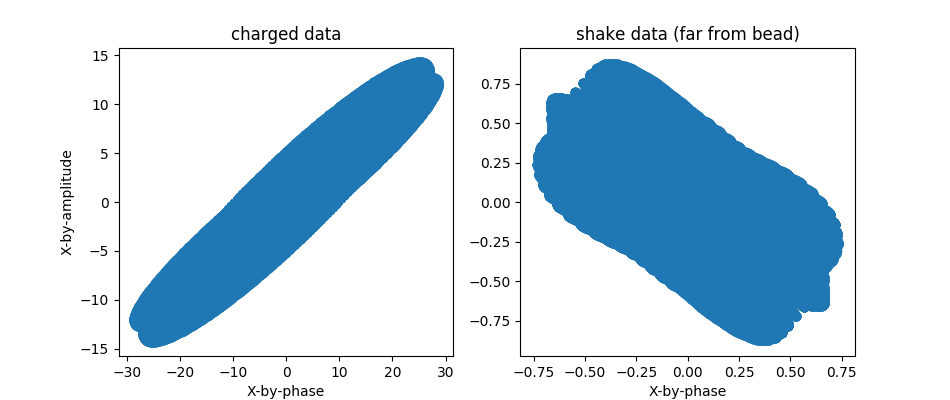

[Text(0.5, 0, 'X-by-phase'), Text(0.5, 1.0, 'shake data (far from bead)')]

In [198]:
_,ax = plt.subplots(1,2,figsize=(9.5,4))
ax[0].scatter(resp_calib_phase,resp_calib_amp)
ax[1].scatter(resp_shake_phase,resp_shake_amp)
ax[0].set(xlabel='X-by-phase',ylabel='X-by-amplitude',title='charged data')
ax[1].set(xlabel='X-by-phase', title='shake data (far from bead)')

In [199]:
resp_shake_angle = give_ab(resp_shake_phase,resp_shake_amp)
resp_calib_angle = give_ab(resp_calib_phase,resp_calib_amp)

<IPython.core.display.Javascript object>


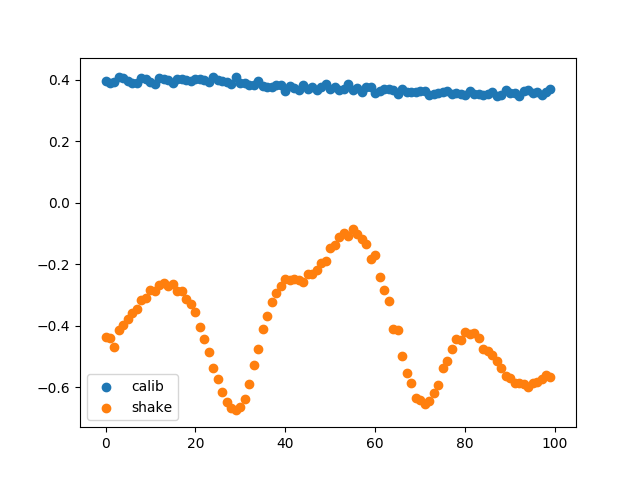

In [200]:
_,ax = plt.subplots()
ax.scatter(range(len(resp_calib_angle)),resp_calib_angle, label = 'calib')
ax.scatter(range(len(resp_shake_angle)),resp_shake_angle, label = 'shake')
ax.legend()

In [201]:
reshape_num = 500
time = np.arange(0,10,1/5000*reshape_num)
resp_calib_angle = give_ab(resp_calib_phase,resp_calib_amp, reshape_num=reshape_num)

resp_shake_angle_all = []
for B in bdf_shake1:
    resp_shake_amp_tmp = B.response_at_freq2('x', drive_freq=143)*50000
    resp_shake_phase_tmp = B.response_at_freq3('x', drive_freq=143)/3
    resp_shake_angle_tmp = give_ab(resp_shake_phase_tmp,resp_shake_amp_tmp, reshape_num=reshape_num)
    resp_shake_angle_all.append(resp_shake_angle_tmp)

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


<IPython.core.display.Javascript object>


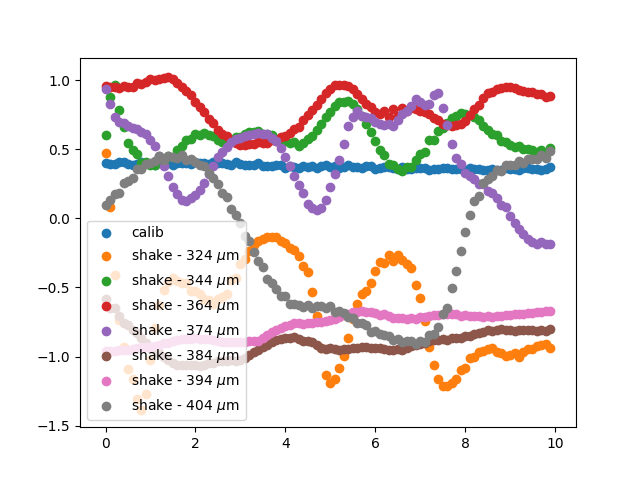

In [202]:
_,ax = plt.subplots()
ax.scatter(time,resp_calib_angle, label = 'calib')
[ax.scatter(time,ss, label = r'shake - {:3.0f} $\mu$m'.format(tt)) for ss,tt in zip(resp_shake_angle_all[1::2],posX[1::2])]
ax.legend()

### Repeatability

In [203]:
### calibration data 
fname = '/home/data_transfer/data_from_windows/20190813/Bead1/Discharge/Discharge_{}.h5'
files = [fname.format(ff_) for ff_ in range(27,32)]
bdf_repeat_calib = [BeadDataFile.BeadDataFile(file) for file in files]

In [204]:
reshape_num = 500
time = np.arange(0,10,1/5000*reshape_num)

resp_repeat_calib_all = []
for B in bdf_repeat_calib:
    resp_shake_amp_tmp = B.response_at_freq2('x', drive_freq=151)*50000
    resp_shake_phase_tmp = B.response_at_freq3('x', drive_freq=151)/3
    resp_shake_angle_tmp = give_ab(resp_shake_phase_tmp,resp_shake_amp_tmp, reshape_num=reshape_num)
    resp_repeat_calib_all.append(resp_shake_angle_tmp)

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [205]:
### shake data 
fname = '/home/data_transfer/data_from_windows/20190813/Bead1/Shaking/Shaking1_{}.h5'
files = [fname.format(ff_) for ff_ in range(10)]
bdf_repeat_shake_10 = [BeadDataFile.BeadDataFile(file) for file in files]
### shake data 
fname = '/home/data_transfer/data_from_windows/20190813/Bead1/Shaking/Shaking2_{}.h5'
files = [fname.format(ff_) for ff_ in range(10)]
bdf_repeat_shake_15 = [BeadDataFile.BeadDataFile(file) for file in files]

In [217]:
resp_repeat_shake_all_10 = [] 
for B in bdf_repeat_shake_10:
    resp_shake_amp_tmp = B.response_at_freq2('x', drive_freq=143)*50000
    resp_shake_phase_tmp = B.response_at_freq3('x', drive_freq=143)/3
    resp_shake_angle_tmp = give_ab(resp_shake_phase_tmp,resp_shake_amp_tmp, reshape_num=reshape_num)
#     print(resp_shake_angle_tmp)
    resp_repeat_shake_all_10.append(resp_shake_angle_tmp)

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [211]:
### no-bead data 
fname = '/home/data_transfer/data_from_windows/20190813/Bead1/Shaking/Shaking{}_0.h5'
files = [fname.format(ff_) for ff_ in range(30,42)]
bdf_repeat_shake_nobead = [BeadDataFile.BeadDataFile(file) for file in files]

In [216]:
resp_repeat_shake_all_nobead = []
for B in bdf_repeat_shake_nobead:
    resp_shake_amp_tmp = B.response_at_freq2('x', drive_freq=143)*50000
    resp_shake_phase_tmp = B.response_at_freq3('x', drive_freq=143)/3
    resp_shake_angle_tmp = give_ab(resp_shake_phase_tmp,resp_shake_amp_tmp, reshape_num=reshape_num)
    resp_repeat_shake_all_nobead.append(resp_shake_angle_tmp)

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


<IPython.core.display.Javascript object>


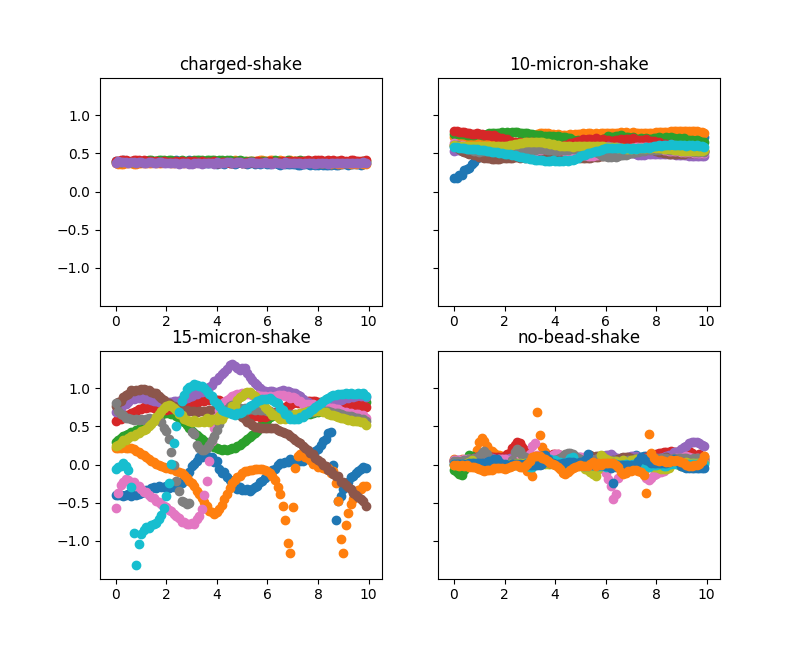

[Text(0.5, 1.0, 'no-bead-shake')]

In [218]:
_, ax = plt.subplots(2,2,figsize=(8,6.5), sharey=True)
[ax[0][0].scatter(time,ss) for ss in resp_repeat_calib_all]
ax[0][0].set(title='charged-shake')
[ax[0][1].scatter(time,ss) for ss in resp_repeat_shake_all_10]
ax[0][1].set(title='10-micron-shake')
[ax[1][0].scatter(time,ss) for ss in resp_repeat_shake_all_15]
ax[1][0].set(title='15-micron-shake')
[ax[1][1].scatter(time,ss) for ss in resp_repeat_shake_all_nobead]
ax[1][1].set(title='no-bead-shake')

<IPython.core.display.Javascript object>


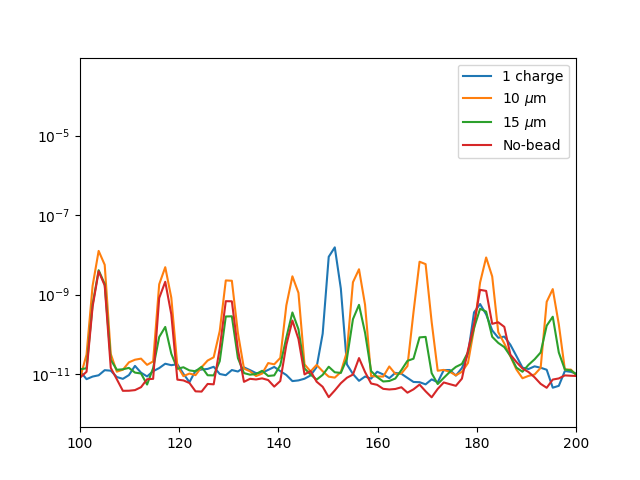

In [90]:
_,ax = plt.subplots()
ax.semilogy(*bdf_repeat_calib[0].welch_psd('x'),label='1 charge')
ax.semilogy(*bdf_repeat_shake_10[0].welch_psd('x'),label='10 $\mu$m')
ax.semilogy(*bdf_repeat_shake_15[0].welch_psd('x'),label='15 $\mu$m')
ax.semilogy(*bdf_repeat_shake_nobead[0].welch_psd('x'),label='No-bead')
ax.set(xlim=(100,200))
ax.legend()

In [147]:
spin_calib = bdf_repeat_calib[0].spin_data
spin_shake_10 = bdf_repeat_shake_10[0].spin_data
spin_shake_15 = bdf_repeat_shake_15[0].spin_data
spin_far = bdf_shake1[0].spin_data
# spin_nobead = bdf_repeat_shake_nobead[0].spin_data # no data
spins = [spin_calib, spin_shake_10,spin_shake_15,spin_far]

In [148]:
res = 5000
fsamp = 5000
ypsd = [matplotlib.mlab.psd(x, Fs = fsamp, NFFT = res)[0] for x in spins]
freqs = matplotlib.mlab.psd(spins[0], Fs = fsamp, NFFT = res)[1]

<IPython.core.display.Javascript object>


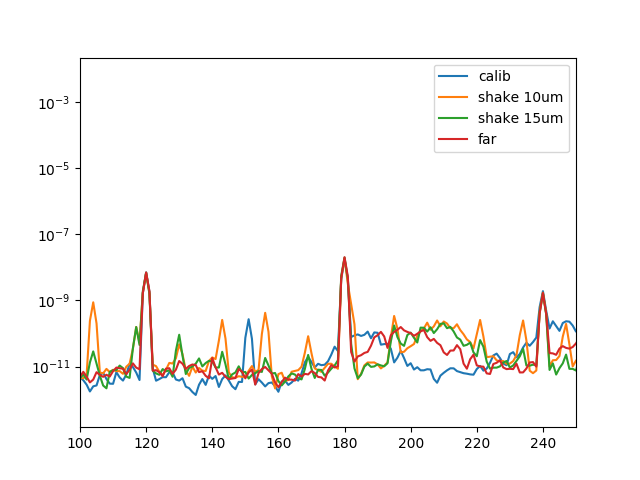

In [177]:
labels = ['calib', 'shake 10um', 'shake 15um','far']
_,ax = plt.subplots()
[ax.semilogy(freqs,y, label=l) for y,l in zip(ypsd,labels)]
ax.set(xlim=(100,250))
ax.legend()

In [172]:
spin_far = res = 5000
fsamp = 5000
ypsd_far = [matplotlib.mlab.psd(x.spin_data, Fs = fsamp, NFFT = res)[0] for x in bdf_shake[1::2]]

<IPython.core.display.Javascript object>


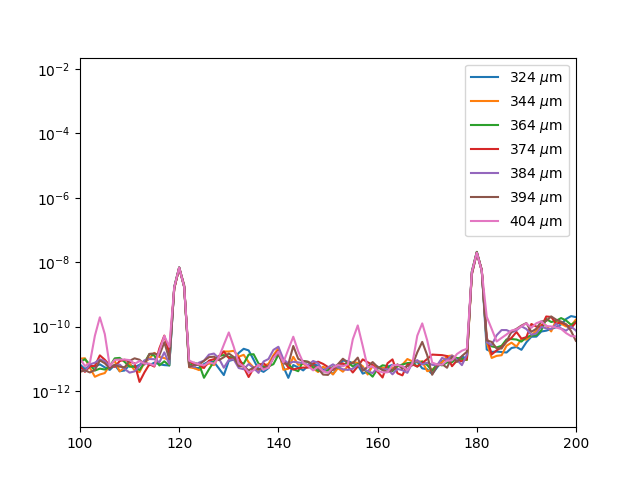

In [173]:
posX = [np.mean(B.cant_pos[0]*50*100/99) for B in bdf_shake[1::2]]
labels_pos = [r'{:3.0f} $\mu$m'.format(tt) for tt in posX]
_,ax = plt.subplots()
[ax.semilogy(freqs,y, label=poss) for poss,y in zip(labels_pos,ypsd_far)]
ax.set(xlim=(100,200))
ax.legend()